# simple_linear_regression_using_keras_API

In [1]:
# Import necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])

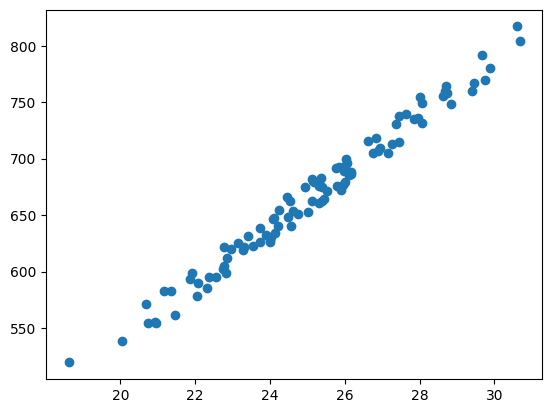

In [3]:
plt.scatter(data['area'], data['price'])
plt.show()

In [4]:
# Normalize the data
data = (data - data.min()) / (data.max() - data.min())

Let us now build the model; since it is a simple linear regressor, we use a Dense layer with
only one unit:

In [5]:
model = tf.keras.models.Sequential([
                      tf.keras.layers.Dense(1, input_shape = [1,], activation=None)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='sgd',
              loss='mean_squared_error')

In [8]:
model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 9s 219ms/step - loss: 0.0064 - val_loss: 0.0095
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0056 - val_loss: 0.0085
Epoch 3/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0049 - val_loss: 0.0076
Epoch 4/100
3/3 [==============================] - 0s 25ms/step - loss: 0.0043 - val_loss: 0.0069
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0038 - val_loss: 0.0062
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0034 - val_loss: 0.0056
Epoch 7/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0030 - val_loss: 0.0052
Epoch 8/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 9/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 10/100
3/3 [==============================] - 0s 41ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 11/100
3/3 [

We can get the predicted value for a given input using the `predict` function:

In [9]:
y_pred = model.predict(data['area'])

4/4 [==============================] - 0s 3ms/step


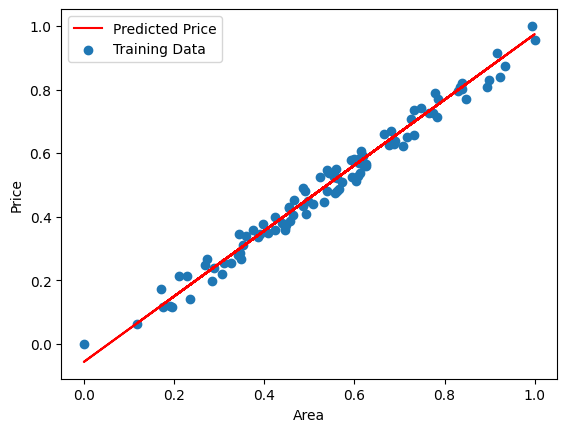

In [10]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [11]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0306641]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.05661417], dtype=float32)>]

---